In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Fast Ai

### Lesson1

In [2]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [6]:
from fastai import *
from fastai.vision import *

In [7]:
help(untar_data)
path = untar_data(URLs.PETS); path

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
path_anno = path/'annotation'
path_img = path/'images'

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/Medy/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [11]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [12]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Birman
Path: /Users/Medy/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pomeranian,Persian,Siamese,Egyptian_Mau
Path: /Users/Medy/.fastai/data/oxford-iiit-pet/images;

Test: None

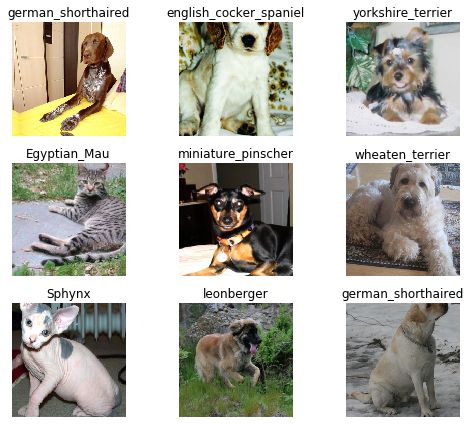

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/Users/Medy/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


### Lesson 2 training  a car classifier 

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
folder = 'bmw'
file = 'urls_bmw.txt'

In [ ]:
folder = 'benz'
file = 'urls_benz.txt'

In [ ]:
folder = 'taho'
file = 'urls_taho.txt'

In [ ]:
path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True) 

In [ ]:
path.ls()

In [ ]:
classes = ['bmw', 'taho', 'benz']

In [ ]:
# download_images(path/file, dest, max_pics=200,  max_workers=0)

In [ ]:
help(download_images)

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-3')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
# copy images from chrome: command, option , J  and get csv then transfrom to .txt


# urls=Array.from(document.querySelectorAll('.rg_i .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));


# or same thing with other java script code:
# var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
#     var hiddenElement = document.createElement('a');
#     hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
#     hiddenElement.target = '_blank';
#     hiddenElement.download = 'myFile.csv';
#     hiddenElement.click();

In [ ]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [ ]:
data.classes

In [ ]:
#  fast.defaults.device - torch.device('cpu')

In [ ]:
learn.export()

In [ ]:
learn = load_learner(path)

In [ ]:
img = open_image('data/cars/bmw/16.png')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [ ]:
img1 = open_image('data/cars/taho/21.png')
img1

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

In [ ]:
img2 = open_image('data/cars/benz/31.png')
img2

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class

### Creating a route: 

In [ ]:
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })